## **1. Find, Select Data, and Data Processing (load, explore dataset…): (2 points)**

In [103]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, MultiLabelBinarizer

warnings.filterwarnings('ignore')

pd.set_option("max_colwidth", None)

Dữ liệu cho câu 2

In [104]:
df_rating = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/animelist.csv', nrows = 200000)[["user_id", "anime_id","rating"]]
df_rating


,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0
4,0,21,10
...,...,...,...
199995,674,15751,7
199996,674,18523,7
199997,674,17391,7
199998,674,18119,8


Dữ liệu cho câu 3.

In [105]:
df_anime = pd.read_csv("../input/anime-recommendation-database-2020/anime.csv")

df_anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [106]:
usecols = ["MAL_ID", "Name", "Score", "Genres", "Type", "Episodes", "Premiered",

           "Studios", "Source", "Rating", "Members"]



df_anime = df_anime[usecols]

print(df_anime.shape)

df_anime.head()

(17562, 11)


,MAL_ID,Name,Score,Genres,Type,Episodes,Premiered,Studios,Source,Rating,Members
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Spring 1998,Sunrise,Original,R - 17+ (violence & profanity),1251960
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,Unknown,Bones,Original,R - 17+ (violence & profanity),273145
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Spring 1998,Madhouse,Manga,PG-13 - Teens 13 or older,558913
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic",TV,26,Summer 2002,Sunrise,Original,PG-13 - Teens 13 or older,94683
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,Fall 2004,Toei Animation,Manga,PG - Children,13224


In [107]:
def process_multilabel(series):

    series = series.split(",")

    if "Unknown" in series:

        series.remove("Unknown")

    return series





df_anime["Genres"] = df_anime["Genres"].map(process_multilabel)

df_anime["Studios"] = df_anime["Studios"].map(process_multilabel)

df_anime["Score"] = df_anime["Score"].replace("Unknown", 0).astype(float)

df_anime["Episodes"] = df_anime["Episodes"].replace("Unknown", 0).astype(int)

#Ví dụ, nếu một giá trị trong cột “Genres” ban đầu là "Action,Adventure,Unknown", sau khi áp dụng hàm process_multilabel, giá trị này sẽ trở thành ["Action", "Adventure"].

print(df_anime.shape)
df_anime.head()

(17562, 11)


,MAL_ID,Name,Score,Genres,Type,Episodes,Premiered,Studios,Source,Rating,Members
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",TV,26,Spring 1998,[Sunrise],Original,R - 17+ (violence & profanity),1251960
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Movie,1,Unknown,[Bones],Original,R - 17+ (violence & profanity),273145
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Shounen]",TV,26,Spring 1998,[Madhouse],Manga,PG-13 - Teens 13 or older,558913
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama, Magic]",TV,26,Summer 2002,[Sunrise],Original,PG-13 - Teens 13 or older,94683
4,8,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",TV,52,Fall 2004,[Toei Animation],Manga,PG - Children,13224


In [108]:
def preprocessing_category(df, column, is_multilabel=False):

    # Binarise labels

    lb = LabelBinarizer()

    if is_multilabel:

        lb = MultiLabelBinarizer()



    expandedLabelData = lb.fit_transform(df[column])

    labelClasses = lb.classes_



    # Create a pandas.DataFrame from our output

    category_df = pd.DataFrame(expandedLabelData, columns=labelClasses)

    del df[column]

    return pd.concat([df, category_df], axis=1)



anime_metadata = df_anime.copy()

anime_metadata = preprocessing_category(anime_metadata, "Type")

anime_metadata = preprocessing_category(anime_metadata, "Premiered")

anime_metadata = preprocessing_category(anime_metadata, "Studios", is_multilabel=True)

anime_metadata = preprocessing_category(anime_metadata, "Source")

anime_metadata = preprocessing_category(anime_metadata, "Rating")

anime_metadata.to_csv("anime_metadata.csv", index=False)



Genres = anime_metadata["Genres"]

ID_NAME = anime_metadata[["MAL_ID", "Name"]]



del anime_metadata["Genres"]

del anime_metadata["MAL_ID"]

del anime_metadata["Name"]

del anime_metadata["Unknown"]



anime_metadata[["Score", "Episodes", "Members"]] = MinMaxScaler().fit_transform(anime_metadata[["Score", "Episodes", "Members"]])

anime_metadata = anime_metadata.values

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer



tfv = TfidfVectorizer(min_df=3,  max_features=None,

            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',

            ngram_range=(1, 3),

            stop_words = 'english')



# Filling NaNs with empty string

genres_original = df_anime['Genres'].fillna('').astype(str)

genres_vector_tf_idf = tfv.fit_transform(genres_original)



#genres_vector_one_hot = preprocessing_category(pd.DataFrame(Genres), "Genres", True).values


In [110]:
print(genres_vector_tf_idf)

  (0, 2061)	0.26310132585849827
  (0, 827)	0.31773671492117006
  (0, 442)	0.42434964689130056
  (0, 218)	0.31955853778155086
  (0, 3)	0.24784555469170855
  (0, 1114)	0.26310132585849827
  (0, 2034)	0.14609871011622846
  (0, 826)	0.31773671492117006
  (0, 428)	0.2383197117927939
  (0, 216)	0.1971832396689817
  (0, 1)	0.19207754059791604
  (0, 2129)	0.22878075839827194
  (0, 1024)	0.14609871011622846
  (0, 2033)	0.14609871011622846
  (0, 721)	0.1454056145596171
  (0, 417)	0.10364811768411182
  (0, 211)	0.13932718265019012
  (0, 0)	0.1256193598339349
  (1, 1765)	0.33518814813113607
  (1, 797)	0.4013536013998254
  (1, 76)	0.40836214883563093
  (1, 1764)	0.33518814813113607
  (1, 793)	0.32444059926393803
  (1, 68)	0.2563235346729988
  (1, 1715)	0.1901937546607015
  :	:
  (17559, 1728)	0.3504193635867384
  (17559, 654)	0.2819056627747309
  (17559, 1727)	0.33244725930168423
  (17559, 2261)	0.2664013969490286
  (17559, 1355)	0.29376543654912823
  (17559, 1912)	0.24686833207347997
  (17559, 135

In [111]:
print(genres_original)

0                         ['Action', ' Adventure', ' Comedy', ' Drama', ' Sci-Fi', ' Space']
1                                      ['Action', ' Drama', ' Mystery', ' Sci-Fi', ' Space']
2                       ['Action', ' Sci-Fi', ' Adventure', ' Comedy', ' Drama', ' Shounen']
3                     ['Action', ' Mystery', ' Police', ' Supernatural', ' Drama', ' Magic']
4                                     ['Adventure', ' Fantasy', ' Shounen', ' Supernatural']
                                                ...                                         
17557                                             ['Adventure', ' Mystery', ' Supernatural']
17558                                                 ['Comedy', ' Horror', ' Supernatural']
17559    ['Mystery', ' Dementia', ' Horror', ' Psychological', ' Supernatural', ' Thriller']
17560                                             ['Adventure', ' Slice of Life', ' Comedy']
17561                                                                 

In [112]:
print("anime_metadata.shape:", anime_metadata.shape)

print("genres_vector_tf_idf.shape:", genres_vector_tf_idf.shape)

#print("genres_vector_one_hot.shape:", genres_vector_one_hot.shape)

anime_metadata.shape: (17562, 1208)
genres_vector_tf_idf.shape: (17562, 2282)


## **3. Implementation: Use numpy, pandas, and sklearn**

In [113]:
from sklearn.model_selection import train_test_split



# Sử dụng anime_metadata làm dữ liệu cho mô hình

X_train, X_test, genres_train, genres_test = train_test_split(anime_metadata, genres_vector_tf_idf, test_size=0.2, random_state=42)



print("X_train.shape:", X_train.shape)

print("X_test.shape:", X_test.shape)

print("genres_train.shape:", genres_train.shape)

print("genres_test.shape:", genres_test.shape)


X_train.shape: (14049, 1208)
X_test.shape: (3513, 1208)
genres_train.shape: (14049, 2282)
genres_test.shape: (3513, 2282)


similarity_matrix.shape: (14049, 14049)


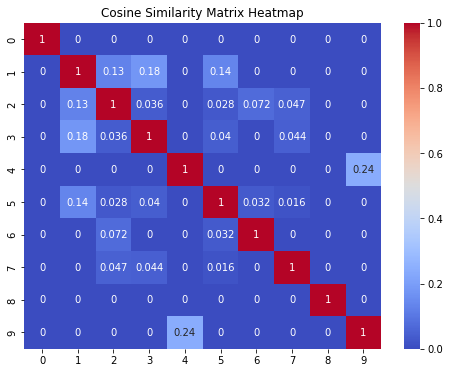

In [114]:
from sklearn.metrics.pairwise import cosine_similarity



# Tính toán độ tương đồng cosine giữa các anime trong tập huấn luyện

similarity_matrix = cosine_similarity(genres_train)

print("similarity_matrix.shape:", similarity_matrix.shape)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix[:10,:10], annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cosine Similarity Matrix Heatmap")
plt.show()


In [115]:
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import mean_squared_error

import numpy as np



# Khởi tạo mô hình KNN duy nhất

k = 10  # số lượng hàng xóm gần nhất

knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k, n_jobs=-1)



# Huấn luyện mô hình KNN với tập huấn luyện (dữ liệu đã mã hóa)

knn_model.fit(genres_train)



# ===========================

# Phần 1: Tính toán RMSE

# ===========================



# Tìm kiếm hàng xóm gần nhất cho tập kiểm tra

distances, indices = knn_model.kneighbors(genres_test)



# Giả sử ta có một hàm để ước tính điểm số dựa trên hàng xóm gần nhất

def estimate_score(neighbors, actual_scores):

    # Trung bình điểm số của hàng xóm để dự đoán

    return np.mean(actual_scores[neighbors], axis=1)



# Dự đoán điểm số dựa trên hàng xóm gần nhất

predicted_scores = estimate_score(indices, X_train[:, 0])  # giả sử cột 0 là điểm số của anime

actual_scores = X_test[:, 0]  # Điểm số thực tế từ tập kiểm tra



# Tính RMSE

rmse = np.sqrt(mean_squared_error(actual_scores, predicted_scores))

print("RMSE:", rmse)



# ===========================

# Phần 2: Tìm kiếm anime gần nhất

# ===========================



# Tìm chỉ số của anime trong dataframe

#id = 32281  # MAL_ID của 'Kimi no Na wa.'

index = ID_NAME[ID_NAME.Name == 'Naruto'].index[0]



# Lấy vector đã mã hóa của anime để tìm hàng xóm gần nhất

vector = genres_train[index].reshape(1, -1)



# Tìm kiếm 5 bộ anime gần nhất với anime 

distances, indices = knn_model.kneighbors(vector)



# Hiển thị thông tin về 10 anime gần nhất

similar_anime = df_anime.iloc[indices[0]][['MAL_ID', 'Name', 'Score', 'Genres']]

print("10 anime gần nhất với 'Naruto.':")

print(similar_anime)


RMSE: 0.27650547770998257
10 anime gần nhất với 'Naruto.':
       MAL_ID  \
3270     3768   
10664   30790   
10         20   
7546    16838   
11273   32221   
1610     1771   
1297     1428   
1840     2020   
6666    12001   
3919     5019   

                                                                              Name  \
3270                                                                     Play Ball   
10664                                                     Yowamushi Pedal: Re:ROAD   
10                                                                          Naruto   
7546                                                      Gaegujang-i Cheonsa-deul   
11273                                                               Robocar Poli 2   
1610                                         Ring ni Kakero 1: Nichibei Kessen-hen   
1297                                                  Lupin III: Pilot Film (1978)   
1840   One Piece: Nenmatsu Tokubetsu Kikaku! Mugiwara no Luffy Oy

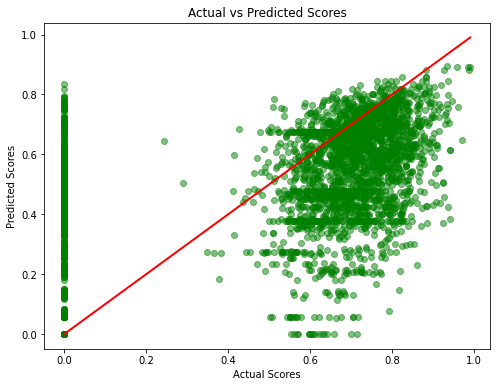

In [116]:
# Visualize actual vs predicted scores

plt.figure(figsize=(8, 6))

plt.scatter(actual_scores, predicted_scores, alpha=0.5, color='green')

plt.plot([min(actual_scores), max(actual_scores)], [min(actual_scores), max(actual_scores)], color='red', lw=2)

plt.title('Actual vs Predicted Scores')

plt.xlabel('Actual Scores')

plt.ylabel('Predicted Scores')

plt.show()


**Thử với dữ liệu anime_metadata**

In [117]:
from sklearn.neighbors import NearestNeighbors



# Sử dụng KNN để tìm k anime gần nhất dựa trên ma trận tương đồng

k = 5  # số lượng hàng xóm gần nhất

knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k, n_jobs=-1)

knn_model.fit(genres_train)



# Tìm kiếm hàng xóm gần nhất cho tập kiểm tra

distances, indices = knn_model.kneighbors(genres_test)

print("indices.shape:", indices.shape)

print("distances.shape:", distances.shape)


indices.shape: (3513, 5)
distances.shape: (3513, 5)


In [118]:
from sklearn.metrics import mean_squared_error



# Giả sử ta có một hàm để ước tính điểm số dựa trên hàng xóm gần nhất

def estimate_score(neighbors, actual_scores):

    # Trung bình điểm số của hàng xóm để dự đoán

    return np.mean(actual_scores[neighbors], axis=1)



# Dự đoán điểm số dựa trên hàng xóm gần nhất

predicted_scores = estimate_score(indices, X_train[:, 0])  #cột 0 là điểm số của anime

actual_scores = X_test[:, 0]  # Điểm số thực tế từ tập kiểm tra



# Tính RMSE

rmse = np.sqrt(mean_squared_error(actual_scores, predicted_scores))

print("RMSE:", rmse)


RMSE: 0.28651807505153926


rmse 0.28651807505153926 là độ chính xác khá cao

In [119]:
query_index = ID_NAME[ID_NAME.Name == 'Naruto'].index[0]

print("query_index:", query_index)

query_index: 10


In [120]:
#id = ##



# Tìm chỉ số của trong dataframe

index = ID_NAME[ID_NAME.Name == 'Naruto'].index[0]



# Khởi tạo mô hình KNN

knn_model = NearestNeighbors(n_neighbors=10, metric='euclidean')



# Huấn luyện mô hình với dữ liệu đã mã hóa (anime_metadata)

knn_model.fit(anime_metadata)



# Lấy vector đã mã hóa

vector = anime_metadata[index].reshape(1, -1)



# Tìm 5 bộ anime gần nhất với

distances, indices = knn_model.kneighbors(vector)



# Hiển thị thông tin về  anime gần nhất

similar_anime = df_anime.iloc[indices[0]][['MAL_ID', 'Name', 'Score', 'Genres']]

print("10 anime gần nhất với 'id Anime cần tìm':")

print(similar_anime)


10 anime gần nhất với 'id Anime cần tìm':
       MAL_ID                             Name  Score  \
10         20                           Naruto   7.91   
1574     1735               Naruto: Shippuuden   8.16   
245       269                           Bleach   7.80   
12493   34572                     Black Clover   7.38   
9256    25013                 Akatsuki no Yona   8.05   
368       392                  Yuu☆Yuu☆Hakusho   8.45   
12492   34566  Boruto: Naruto Next Generations   5.81   
11234   32105               Sousei no Onmyouji   7.32   
8598    22101     Soredemo Sekai wa Utsukushii   7.67   
8411    21185                       Baby Steps   7.85   

                                                                     Genres  
10     [Action,  Adventure,  Comedy,  Super Power,  Martial Arts,  Shounen]  
1574   [Action,  Adventure,  Comedy,  Super Power,  Martial Arts,  Shounen]  
245    [Action,  Adventure,  Comedy,  Super Power,  Supernatural,  Shounen]  
12493             

## **2. Implementation: Use Surprise library: (4 points)**

In [121]:
print(df_rating.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


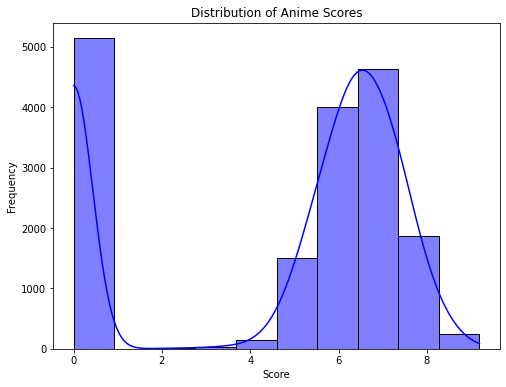

In [122]:
# Visualize the distribution of anime scores

plt.figure(figsize=(8, 6))

sns.histplot(df_anime['Score'], bins=10, kde=True, color='blue')

plt.title('Distribution of Anime Scores')

plt.xlabel('Score')

plt.ylabel('Frequency')

plt.show()

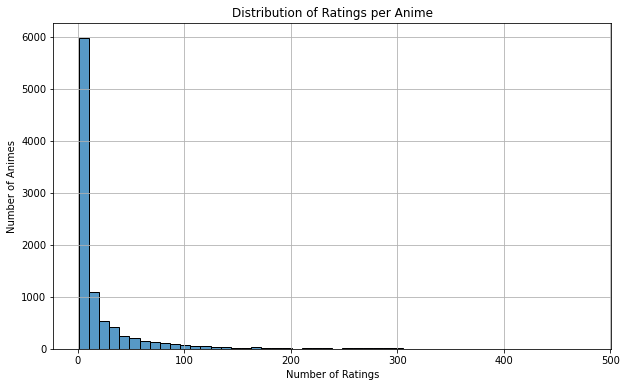

In [123]:
# Đếm số lượng đánh giá cho mỗi anime_id
anime_counts = df_rating.groupby('anime_id').size().reset_index(name='count')

# Vẽ biểu đồ phân bố số lượng đánh giá mỗi anime
plt.figure(figsize=(10, 6))
sns.histplot(anime_counts['count'], bins=50, kde=False)  # Biểu đồ histogram
plt.title('Distribution of Ratings per Anime')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Animes')
plt.grid(True)
plt.show()

# # In ra các anime có nhiều đánh giá để xem chi tiết hơn
# top_anime = anime_counts.sort_values(by='count', ascending=False).head(10)
# print("Top 10 anime with the most ratings:")
# print(top_anime)

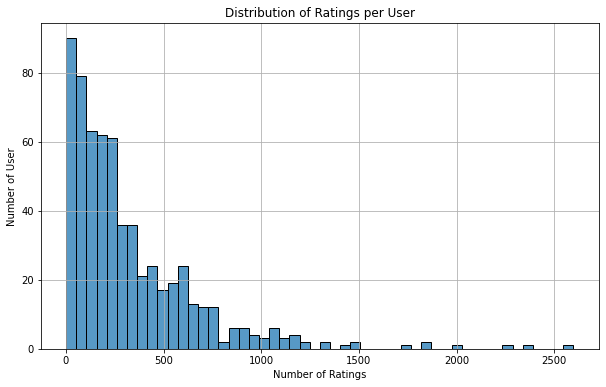

In [124]:
# Đếm số lượng đánh giá cho mỗi user_id
user_counts = df_rating.groupby('user_id').size().reset_index(name='count')

# Vẽ biểu đồ phân bố số lượng đánh giá mỗi user
plt.figure(figsize=(10, 6))
sns.histplot(user_counts['count'], bins=50, kde=False)  # Biểu đồ histogram
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of User')
plt.grid(True)
plt.show()

# #  In ra các user có nhiều đánh giá để xem chi tiết hơn
# top_user = user_counts.sort_values(by='count', ascending=False).head(10)
# print("Top 10 user with the most ratings:")
# print(top_anime)

In [125]:
df_rating_filtered = df_rating[df_rating['rating'] != 0]
df_rating_filtered

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
4,0,21,10
5,0,24,9
...,...,...,...
199995,674,15751,7
199996,674,18523,7
199997,674,17391,7
199998,674,18119,8


In [126]:
# Loại bỏ các anime có ít hơn 10 đánh giá
df_rating_filtered = df_rating_filtered.groupby('anime_id').filter(lambda x: len(x) >= 10)
# Loại bỏ các user có ít hơn 10 đánh giá
df_rating_filtered = df_rating_filtered.groupby('user_id').filter(lambda x: len(x) >= 10)
df_rating_filtered


,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
4,0,21,10
5,0,24,9
...,...,...,...
199993,674,15119,7
199995,674,15751,7
199996,674,18523,7
199998,674,18119,8


In [127]:
print(df_rating_filtered.groupby('anime_id').size())
print(df_rating_filtered.groupby('user_id').size())

anime_id
1        182
5         68
6         97
7         27
15        27
        ... 
41619     17
41930     18
42203     12
42897     16
43299     11
Length: 2409, dtype: int64
user_id
0       36
1      113
2       52
3      310
4       98
      ... 
670     28
671    242
672    102
673    323
674    371
Length: 544, dtype: int64


In [128]:
!pip install scikit-surprise

In [129]:
# Import các thư viện cần thiết

from surprise import KNNBasic, Dataset, Reader, accuracy

from surprise.model_selection import train_test_split

# Bước 1: Chuẩn bị dữ liệu

# df_rating chứa các cột ["user_id", "Name", "anime_id", "rating", "watching_status", "watched_episodes"]

# Sử dụng các cột user_id, anime_id, và rating

# rating_df = df_rating[["user_id", "anime_id", "rating"]]


# Lưu tạm dữ liệu vào file CSV (nếu cần thiết)

# rating_df.to_csv("anime_ratings.csv", index=False)


# Đọc dữ liệu từ file CSV với Surprise

reader = Reader(line_format='user item rating', sep=',', skip_lines=1, rating_scale=(1, 10))  # Giả sử rating từ 1 đến 10

data = Dataset.load_from_df(df_rating_filtered, reader=reader) # or load_from_file


In [130]:
# Bước 2: Chia dữ liệu thành tập huấn luyện và tập kiểm tra (test_size = 30%)

trainset, testset = train_test_split(data, test_size=0.3, random_state = 42)



# In ra thông tin về số lượng người dùng và item trong tập huấn luyện

print(f"Total {trainset.n_users} users and {trainset.n_items} items in the training set.")



Total 544 users and 2409 items in the training set.


Computing the cosine similarity matrix...
Done computing similarity matrix.


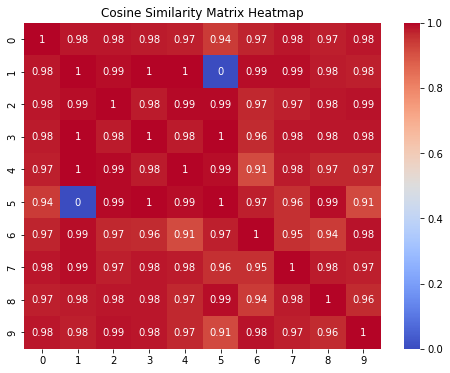

In [131]:
# Bước 3: Khởi tạo mô hình KNN và thiết lập các tùy chọn hyperparameters

# sim_options bao gồm độ đo tương đồng (cosine) và xác định việc sử dụng item-based collaborative filtering

sim_options = {

    'name': 'cosine',  # Sử dụng cosine similarity

    'user_based': False  # Item-based collaborative filtering (anime-based)

}



# Khởi tạo mô hình KNNBasic với tùy chọn hyperparameters

algo = KNNBasic(sim_options=sim_options)



# Huấn luyện mô hình với tập trainset

algo.fit(trainset)
similarity_matrix = algo.sim[:10, :10]
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cosine Similarity Matrix Heatmap")
plt.show()

In [132]:
# Bước 4: Dự đoán cho tập testset và tính toán RMSE

predictions = algo.test(testset)



# Tính toán RMSE

rmse = accuracy.rmse(predictions)



# In ra kết quả RMSE

print(f"RMSE: {rmse}")

RMSE: 1.4827
RMSE: 1.4826545473437145


In [133]:
# Bước 5 (tùy chọn): Dự đoán rating cho một user và một anime cụ thể

# Ví dụ, dự đoán điểm đánh giá của user 0 cho anime 67 ("Basilisk: Kouga Ninpou Chou")

uid = str(0)  # ID của người dùng

name_to_find = 'Basilisk: Kouga Ninpou Chou'
id_found = ID_NAME.loc[ID_NAME['Name'] == name_to_find, 'MAL_ID'].values[0] # ID của anime


# Dự đoán điểm số
uid= 0
id_found = 67

pred = algo.predict(uid, id_found)

print(f"Dự đoán điểm của user {uid} cho anime {name_to_find}: {pred.est}")

Dự đoán điểm của user 0 cho anime Basilisk: Kouga Ninpou Chou: 7.691021969918709


In [134]:
result = df_rating_filtered[(df_rating_filtered['user_id'] == uid) & (df_rating_filtered['anime_id'] == id_found)]
result

,user_id,anime_id,rating
0,0,67,9


Lưu mô hình KNN Surprise  

In [135]:
# import joblib

# Lưu mô hình vào file
# joblib.dump(algo, 'knn_model.pkl')
# Tải mô hình từ file
# algo_loaded = joblib.load('knn_model.pkl')

In [136]:
# Tải mô hình từ file
# algo_loaded = joblib.load('knn_model.pkl')

In [137]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Bước 1: Chuẩn bị dữ liệu
# Giả sử bạn đã có dataframe rating_data chứa ["user_id", "anime_id", "rating"]
# Chuyển đổi thành ma trận user-item interaction
rating_df = df_rating_filtered.pivot(index='user_id', columns='anime_id', values='rating')

# Bước 2: Xây dựng ma trận tương tác (user-item matrix)

user_item_matrix = rating_df.values  # Chuyển thành numpy array

# Bước 3: Tính toán độ tương đồng cosine giữa các item (anime-based collaborative filtering)
def cosine_similarity(matrix):
    norm = np.linalg.norm(matrix, axis=1, keepdims=True)  # Tính chuẩn của từng hàng (anime)
    return np.dot(matrix, matrix.T) / (norm * norm.T)  # Ma trận độ tương đồng cosine

# Tính ma trận tương đồng giữa các anime (item-based)
similarity_matrix = cosine_similarity(user_item_matrix.T)

# Bước 4: Dự đoán điểm đánh giá cho anime dựa trên các anime tương tự (KNN)
def predict_ratings(user_item_matrix, similarity_matrix, k=5):
    # Tạo ma trận dự đoán trống
    predicted_ratings = np.zeros(user_item_matrix.shape)

    # Với mỗi user, dự đoán điểm đánh giá dựa trên các hàng xóm gần nhất (KNN)
    for i in range(user_item_matrix.shape[0]):  # Duyệt qua từng user
        for j in range(user_item_matrix.shape[1]):  # Duyệt qua từng anime
            if user_item_matrix[i, j] == 0:  # Chỉ dự đoán cho những anime chưa được đánh giá
                # Lấy k anime tương tự nhất (hàng xóm) dựa trên độ tương đồng
                similar_items = np.argsort(similarity_matrix[j, :])[-k-1:-1]
                similar_ratings = user_item_matrix[i, similar_items]
                similar_similarities = similarity_matrix[j, similar_items]
                
                # Dự đoán điểm đánh giá bằng cách trung bình có trọng số các điểm đánh giá của hàng xóm
                if np.sum(similar_similarities) > 0:
                    predicted_ratings[i, j] = np.dot(similar_ratings, similar_similarities) / np.sum(similar_similarities)
                else:
                    predicted_ratings[i, j] = 0
    return predicted_ratings

# Dự đoán điểm đánh giá cho tất cả các anime mà người dùng chưa xem
predicted_ratings = predict_ratings(user_item_matrix, similarity_matrix, k=5)

# Bước 5: Đánh giá mô hình bằng cách tính RMSE cho những anime đã có điểm đánh giá
def compute_rmse(true_ratings, predicted_ratings):
    # Chỉ tính RMSE cho những giá trị không phải là 0 (những giá trị đã được đánh giá)
    mask = true_ratings > 0
    return np.sqrt(mean_squared_error(true_ratings[mask], predicted_ratings[mask]))

# Tính RMSE giữa ma trận điểm đánh giá thật và ma trận điểm dự đoán
rmse = compute_rmse(user_item_matrix, predicted_ratings)
print(f"RMSE: {rmse}")

# Bước 6: Ví dụ dự đoán cho một user và một anime cụ thể
def predict_single(user_id, anime_id, user_item_matrix, similarity_matrix, k=5):
    user_idx = rating_df.index.get_loc(user_id)  # Tìm vị trí của user trong ma trận
    anime_idx = rating_df.columns.get_loc(anime_id)  # Tìm vị trí của anime trong ma trận

    # Lấy k anime tương tự nhất
    similar_items = np.argsort(similarity_matrix[anime_idx, :])[-k-1:-1]
    similar_ratings = user_item_matrix[user_idx, similar_items]
    similar_similarities = similarity_matrix[anime_idx, similar_items]
    
    # Dự đoán điểm đánh giá
    if np.sum(similar_similarities) > 0:
        predicted_rating = np.dot(similar_ratings, similar_similarities) / np.sum(similar_similarities)
    else:
        predicted_rating = 0
    return predicted_rating

# Ví dụ dự đoán điểm cho một user và một anime
user_id = 0
anime_id = 67  # MAL_ID của "Basilisk: Kouga Ninpou Chou"
predicted_rating = predict_single(user_id, anime_id, user_item_matrix, similarity_matrix, k=5)
print(f"Dự đoán điểm đánh giá của user {user_id} cho anime {anime_id}: {predicted_rating}")


RMSE: 7.832355653296687
Dự đoán điểm đánh giá của user 0 cho anime 67: 0
